## Binary Classification: Kaggle HR Analytics
https://www.kaggle.com/giripujar/hr-analytics

** Dataset Information: **

14999 Employees' information and flag indicating whether they left the company

** Attribute Information: (9 features and 1 class)**

1. satisfaction_level       
2. last_evaluation          
3. number_project          
4. average_montly_hours     
5. time_spend_company       
6. Work_accident         
7. left (class: 0 or 1)                     
8. promotion_last_5years   
9. Department               
10. salary 

** Objective of this project **

predict whether a employee leaves a company or not (class: 0 or 1) based on the other variables (features)

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
# Inspect Data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
df.shape

(14999, 10)

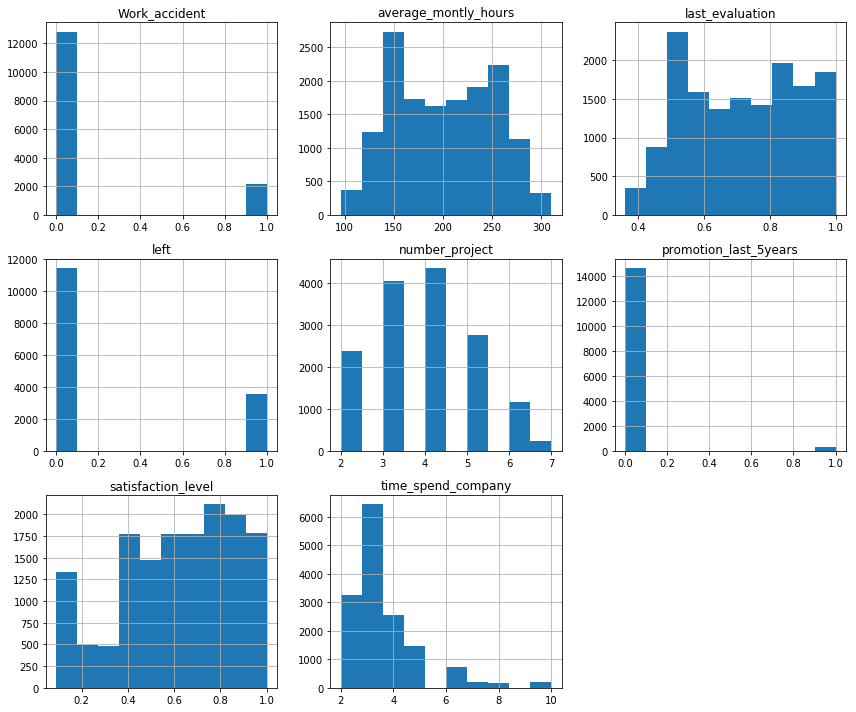

In [7]:
_ = df.hist(figsize=(12,10))
plt.tight_layout()

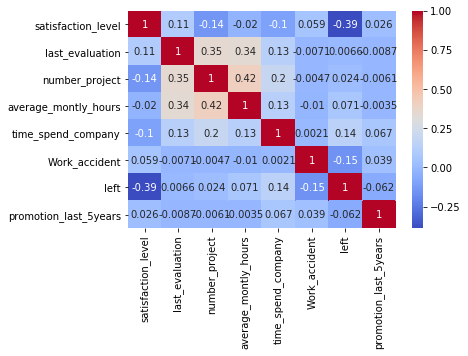

In [10]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
df['left'].value_counts() #imbalanced classes-->stratify

0    11428
1     3571
Name: left, dtype: int64

In [14]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

## Data preprocessing

** Convert Categorical to Dummy Variables **

In [5]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [34]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
df = pd.get_dummies(df,drop_first=True) #drop_first to avoid dummy trap
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


** Split Features & Class (or target) **

In [7]:
X = df.drop('left', axis=1).values
y = df['left'].values
print(X.shape,y.shape)

(14999, 18) (14999,)


** Split Train Test Sets **

In [4]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11999, 18) (3000, 18) (11999,) (3000,)


In [9]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([0, 1], dtype=int64), array([9142, 2857], dtype=int64))

** Scale features **

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Models

In [11]:
# Import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [12]:
models = []
#linear
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#non-linear
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
#ensemble
models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=seed)))
models.append(('XGB', XGBClassifier(random_state=seed)))

Accuracy: mean +/- std
LR: 78.9% +/- 0.9%
LDA: 77.8% +/- 0.8%
KNN: 93.9% +/- 0.3%
NB: 73.2% +/- 0.6%
DT: 97.9% +/- 0.2%
SVM: 94.9% +/- 0.2%
RF: 99.0% +/- 0.2%
XGB: 97.5% +/- 0.1%


Text(0.5,1,'Model Comparison')

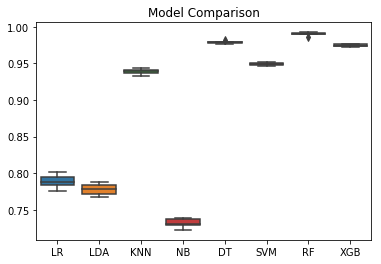

In [53]:
# cross validation
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=5, random_state=seed)
scoring = 'accuracy' #'roc_auc' yeilds the same ranking
names = []
results = []
print('Accuracy: mean +/- std')
for name,model in models:
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)    
    print('{}: {:0.1f}% +/- {:0.1f}%'.format(name, cv_results.mean()*100, 
                                             cv_results.std()*100))
# visualize results
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.title('Model Comparison')
plt.ylabel('Accuracy')

## Parameter Tuning
try to improve 2 top algorithms: RF, DT

#### Model 1: RandomForest

In [54]:
# Default
model = RandomForestClassifier(n_estimators=100,random_state=seed)
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


Accuracy of test set: 99.2%


In [65]:
# Grid Search
model = RandomForestClassifier(random_state=seed)

# parameters
n_estimators = [100, 200]
max_depth = [30,50]
#criterion = ['gini','entropy'] #gini is b
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)#, criterion=criterion)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=5, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   24.0s finished


0.990416 (0.002060) with: {'max_depth': 30, 'n_estimators': 100}
0.990666 (0.002037) with: {'max_depth': 30, 'n_estimators': 200}
0.990416 (0.002060) with: {'max_depth': 50, 'n_estimators': 100}
0.990666 (0.002037) with: {'max_depth': 50, 'n_estimators': 200}


Best accuracy of training set: 99.1% using {'max_depth': 30, 'n_estimators': 200}
Accuracy of test set: 99.1%


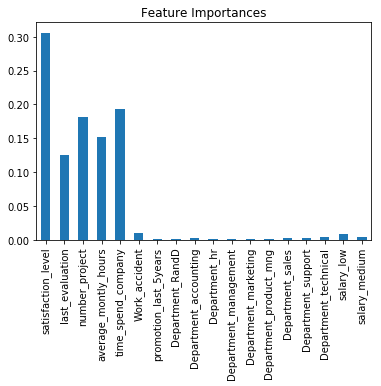

In [66]:
# Feature Importance
model = RandomForestClassifier(max_depth=30,n_estimators=200,random_state=seed)
model.fit(X_train, y_train)
pd.DataFrame(data=model.feature_importances_,
             index=df.drop('left',axis=1).columns).plot(kind='bar',legend=False,
                                                        title='Feature Importances')

#### Model 2: Decision Tree

In [67]:
# Default
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


Accuracy of test set: 97.8%


In [68]:
# Grid Search
model = DecisionTreeClassifier()

# parameters
max_depth = [8,10,12]
param_grid = dict(max_depth=max_depth)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=5, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.979665 (0.002071) with: {'max_depth': 8}
0.979165 (0.002258) with: {'max_depth': 10}
0.980415 (0.002832) with: {'max_depth': 12}


Best accuracy of training set: 98.0% using {'max_depth': 12}
Accuracy of test set: 97.9%


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished


## Final Model: RF 
(max_depth=30,n_estimators=200)

** Final Model **

In [13]:
model = RandomForestClassifier(max_depth=30,n_estimators=200,random_state=seed)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))

Accuracy of training set: 100.0%


** Save and load the final model **

In [14]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(model, open(filename, 'wb'))

In [15]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
accuracy = model.score(X_train, y_train)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))

Accuracy of training set: 100.0%


** Classification report & Confusion Matrix **

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      9142
          1       1.00      1.00      1.00      2857

avg / total       1.00      1.00      1.00     11999



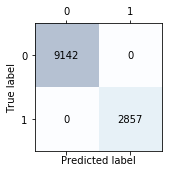

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#classification report
print(classification_report(y_train, model.predict(X_train)))

#confusion matrix
confmat = confusion_matrix(y_train, model.predict(X_train))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

In [17]:
# predict class with test set (new, unseen)
y_pred = model.predict(X_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy of test set: 99.1%


             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2286
          1       0.99      0.97      0.98       714

avg / total       0.99      0.99      0.99      3000



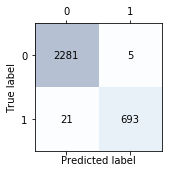

In [18]:
#classification report
print(classification_report(y_test, model.predict(X_test)))

#confusion matrix
confmat = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Summary

Best model: ** RandomForest ** w/param: max_depth=30,n_estimators=200

Accuracy of test set: ** 99.1% **